In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re #Permet de gerer les expressions régulieres
import sys
path=r'C:\Users\Virgil MESLE\Documents\0-Obsidian\Python\My_codes\0-My_module'
sys.path.append(path)
import fonctions as fct
import math
import matplotlib.colors as mcolors # Permet de creer une liste de couleur

import seaborn as sns
%matplotlib inline

from parse import compile

import os
from os import listdir # Parcourir les repertoires
from os.path import isfile, join

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = [15,10]
plt.rcParams['font.size'] = '14'

In [2]:
from astropy import units as u

from poliastro.bodies import Earth, Mars, Sun
from poliastro.twobody import Orbit

# Documentation
[Poliastro](https://docs.poliastro.space/en/stable/index.html)
- [Going to juptyer](https://docs.poliastro.space/en/stable/examples/Going%20to%20Jupiter%20with%20Python%20using%20Jupyter%20and%20poliastro.html)
- [Loading OMM and TLE satellite data](https://docs.poliastro.space/en/stable/examples/Loading%20OMM%20and%20TLE%20satellite%20data.html)

# Define an orbit

## From classical orbital elements

- Semimajor axis $(a)$.  
- Eccentricity $(e)$.  
- Inclination $(i)$.  
- Right ascension of the ascending node $(\Omega)$.  
- Argument of pericenter $(\omega)$.  
- True anomaly $(\nu)$.  

![img](https://astronomy.swin.edu.au/cms/cpg15x/albums/userpics/orbitalelements.jpg)

In [3]:
a = 1.523679 << u.AU
ecc = 0.093315 << u.one
inc = 1.85 << u.deg
raan = 49.562 << u.deg
argp = 286.537 << u.deg
nu = 23.33 << u.deg

orb = Orbit.from_classical(Sun, a, ecc, inc, raan, argp, nu)

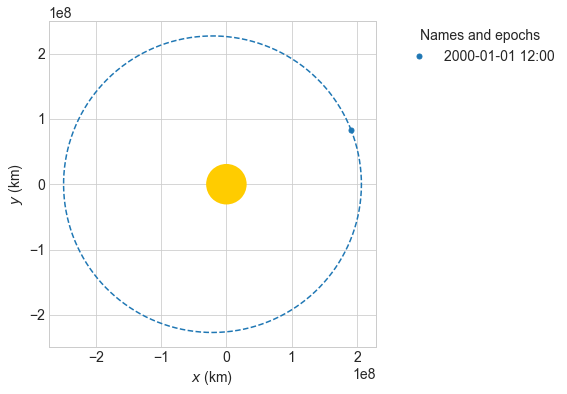

In [4]:
orb.plot()

Notice that whether you create an Orbit from $(r)$ and $(v)$ or from elements you can access many mathematical properties of the orbit:

In [5]:
orb.period.to(u.day)

<Quantity 686.97138348 d>

In [6]:
orb.v

<Quantity [ 1.16420212, 26.29603633,  0.52229379] km / s>

## From personnal info

In [7]:
r_earth = Earth.R_mean << u.km
h_orbit = 600 << u.km 
a =  r_earth + h_orbit
ecc = 0 << u.one
inc = 1.85 << u.deg
raan = 49.562 << u.deg
argp = 286.537 << u.deg
nu = 23.33 << u.deg

orb = Orbit.from_classical(Earth, a, ecc, inc, raan, argp, nu)

In [8]:
h_orbit

<Quantity 600. km>

In [21]:
Orbit

poliastro.twobody.orbit.scalar.Orbit

In [9]:
orb.plot(use_3d=True, interactive=True)

In [10]:
op.plot(orb)
op.plot(orb.propagate(30*u.min))

NameError: name 'op' is not defined

In [ ]:
Earth.rotational_period

<Quantity 0.9972698 d>

In [ ]:
Earth.mass

<Quantity 5.97216787e+24 kg>

## Astropy units

In [ ]:
q = 42.0 * u.meter

In [ ]:
q.value

In [ ]:
q.unit

## 3D plotting from TLE

Source : https://space.stackexchange.com/questions/25958/how-can-i-plot-a-satellites-orbit-in-3d-from-a-tle-using-python-and-skyfield

[#################################] 100% de421.bsp


2458156.5565260607
(3, 300)
hw was None so set to: 10788.528972688095
centers are:  [1001.5822368833415, -3231.563125110535, 0.0]
hw is:        10788.528972688095


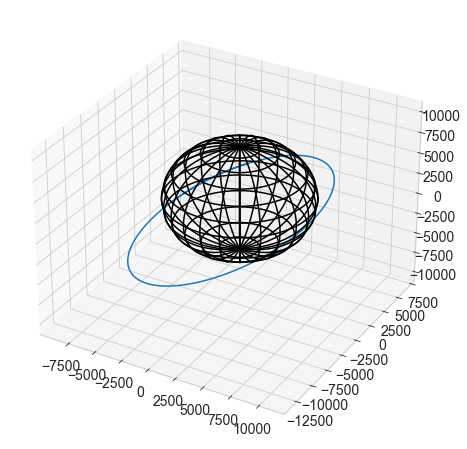

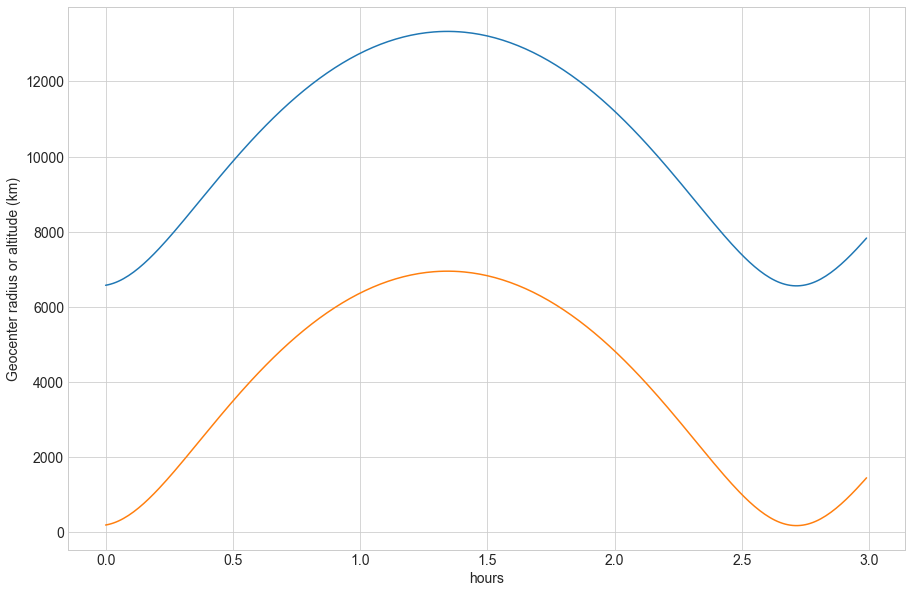

In [ ]:
def makecubelimits(axis, centers=None, hw=None):
    lims = ax.get_xlim(), ax.get_ylim(), ax.get_zlim()
    if centers == None:
        centers = [0.5*sum(pair) for pair in lims] 

    if hw == None:
        widths  = [pair[1] - pair[0] for pair in lims]
        hw      = 0.5*max(widths)
        ax.set_xlim(centers[0]-hw, centers[0]+hw)
        ax.set_ylim(centers[1]-hw, centers[1]+hw)
        ax.set_zlim(centers[2]-hw, centers[2]+hw)
        print("hw was None so set to:", hw)
    else:
        try:
            hwx, hwy, hwz = hw
            print("ok hw requested: ", hwx, hwy, hwz)

            ax.set_xlim(centers[0]-hwx, centers[0]+hwx)
            ax.set_ylim(centers[1]-hwy, centers[1]+hwy)
            ax.set_zlim(centers[2]-hwz, centers[2]+hwz)
        except:
            print("nope hw requested: ", hw)
            ax.set_xlim(centers[0]-hw, centers[0]+hw)
            ax.set_ylim(centers[1]-hw, centers[1]+hw)
            ax.set_zlim(centers[2]-hw, centers[2]+hw)

    return centers, hw

TLE = """1 43205U 18017A   18038.05572532 +.00020608 -51169-6 +11058-3 0  9993
2 43205 029.0165 287.1006 3403068 180.4827 179.1544 08.75117793000017"""
L1, L2 = TLE.splitlines()

from skyfield.api import Loader, EarthSatellite
from skyfield.timelib import Time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

halfpi, pi, twopi = [f*np.pi for f in [0.5, 1, 2]]
degs, rads = 180/pi, pi/180

load = Loader('~/Documents/fishing/SkyData')
data = load('de421.bsp')
ts   = load.timescale()

planets = load('de421.bsp')
earth   = planets['earth']

Roadster = EarthSatellite(L1, L2)

print(Roadster.epoch.tt)
hours = np.arange(0, 3, 0.01)

time = ts.utc(2018, 2, 7, hours)

Rpos    = Roadster.at(time).position.km
Rposecl = Roadster.at(time).ecliptic_position().km

print(Rpos.shape)

re = 6378.

theta = np.linspace(0, twopi, 201)
cth, sth, zth = [f(theta) for f in [np.cos, np.sin, np.zeros_like]]
lon0 = re*np.vstack((cth, zth, sth))
lons = []
for phi in rads*np.arange(0, 180, 15):
    cph, sph = [f(phi) for f in [np.cos, np.sin]]
    lon = np.vstack((lon0[0]*cph - lon0[1]*sph,
                     lon0[1]*cph + lon0[0]*sph,
                     lon0[2]) )
    lons.append(lon)

lat0 = re*np.vstack((cth, sth, zth))
lats = []
for phi in rads*np.arange(-75, 90, 15):
    cph, sph = [f(phi) for f in [np.cos, np.sin]]
    lat = re*np.vstack((cth*cph, sth*cph, zth+sph))
    lats.append(lat)

if True:    
    fig = plt.figure(figsize=[10, 8])  # [12, 10]

    ax  = fig.add_subplot(1, 1, 1, projection='3d')

    x, y, z = Rpos
    ax.plot(x, y, z)
    for x, y, z in lons:
        ax.plot(x, y, z, '-k')
    for x, y, z in lats:
        ax.plot(x, y, z, '-k')

    centers, hw = makecubelimits(ax)

    print("centers are: ", centers)
    print("hw is:       ", hw)

    plt.show()

r_Roadster = np.sqrt((Rpos**2).sum(axis=0))
alt_roadster = r_Roadster - re

if True:
    plt.figure()
    plt.plot(hours, r_Roadster)
    plt.plot(hours, alt_roadster)
    plt.xlabel('hours', fontsize=14)
    plt.ylabel('Geocenter radius or altitude (km)', fontsize=14)
    plt.show()

## Convertir TLE en paramètre orbitaux

In [6]:
from skyfield.api import Loader, EarthSatellite
# from skyfield.timelib import Time
import numpy as np
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
from math import degrees

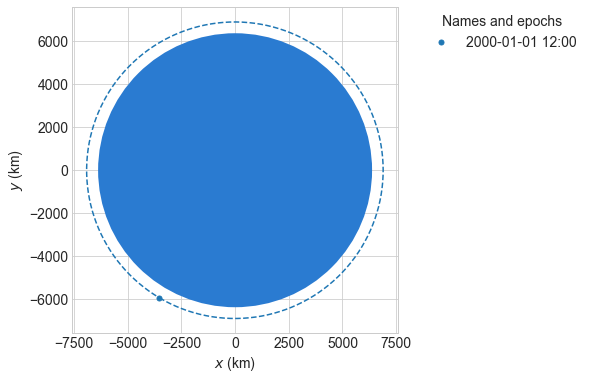

In [81]:
orb.plot()

In [83]:
type(orb.plot(use_3d=True, interactive=True))

plotly.graph_objs._figure.Figure